In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("/kaggle/input/fish-market/Fish.csv")

In [5]:
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [8]:
num_cols=['Length1','Length2','Length3','Height','Width']

In [9]:
cat_cols=['Species']

In [10]:
import plotly.express as px 
fig = px.scatter(data, x="Weight", y="Height")
fig.show()

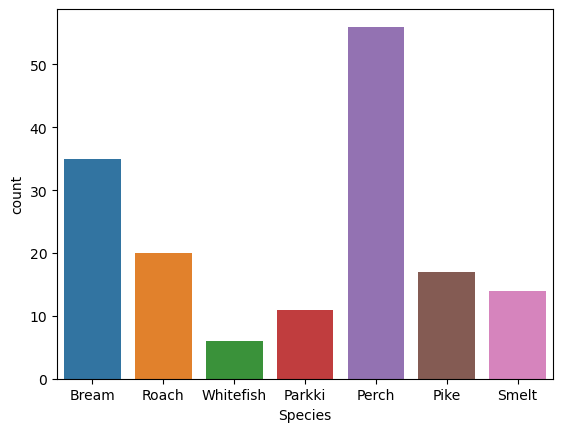

In [11]:
sns.countplot(x=data.Species)
plt.show()

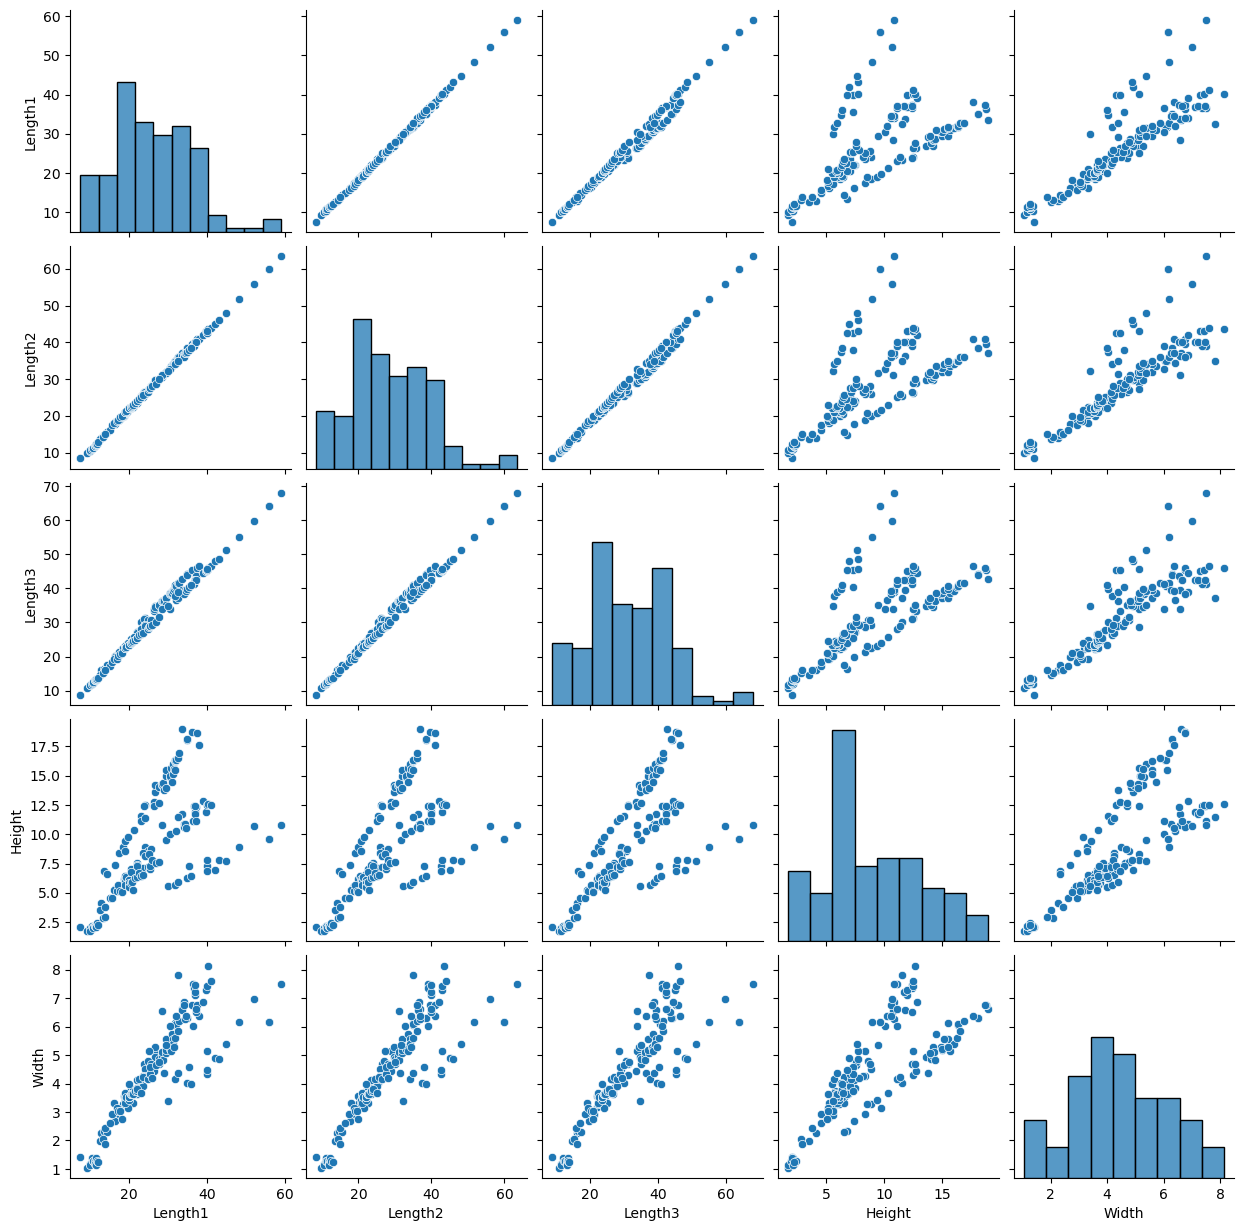

In [12]:
sns.pairplot(data[num_cols])

In [13]:
data.columns


Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [14]:
data.shape


(159, 7)

In [15]:
data[cat_cols]=data[cat_cols].astype('category')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  159 non-null    category
 1   Weight   159 non-null    float64 
 2   Length1  159 non-null    float64 
 3   Length2  159 non-null    float64 
 4   Length3  159 non-null    float64 
 5   Height   159 non-null    float64 
 6   Width    159 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 8.1 KB


In [17]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Finding the missing values

In [18]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

DROP DUPLICATES

In [19]:
data=data.drop_duplicates()
print(data.shape)

(159, 7)


train_test split

In [20]:
X=data.drop(['Weight'],axis=1)

In [21]:
y=data['Weight']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=123)

In [23]:
X_train.shape

(111, 6)

In [24]:
X_test.shape

(48, 6)

In [25]:
y_train.shape

(111,)

In [26]:
y_test.shape

(48,)

In [27]:
X_train.head()

,Species,Length1,Length2,Length3,Height,Width
117,Perch,36.5,39.0,41.4,11.1366,6.0030
116,Perch,36.5,39.0,41.4,11.1366,7.4934
5,Bream,26.8,29.7,34.7,13.6024,4.9274
16,Bream,30.4,33.0,38.3,14.8604,5.2854
45,Roach,20.5,22.5,25.3,7.0334,3.8203


In [28]:
y_train.head()

117    650.0
116    900.0
5      450.0
16     700.0
45     160.0
Name: Weight, dtype: float64

Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [31]:
X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)

In [32]:
X_test_num=pd.DataFrame(scaler.transform(X_test[num_cols]),columns=num_cols)

In [33]:
X_train_num

,Length1,Length2,Length3,Height,Width
0,1.127343,1.089549,0.976588,0.577583,1.012053
1,1.127343,1.089549,0.976588,0.577583,1.912590
2,0.118273,0.186650,0.376498,1.164155,0.362149
3,0.492773,0.507034,0.698934,1.463413,0.578461
4,-0.537102,-0.512369,-0.465418,-0.398501,-0.306789
...,...,...,...,...,...
106,0.492773,0.507034,0.716847,1.481872,0.525350
107,-0.318644,-0.308488,-0.384809,-0.469866,-0.098029
108,-0.693144,-0.687124,-0.653506,-0.040676,-0.624551
109,1.512246,1.526436,1.388589,0.926653,2.304490


In [34]:
X_train_num.shape

(111, 5)

ONE HOT ENCONDING

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe=OneHotEncoder()


In [37]:
X_train_cat=ohe.fit_transform(X_train[cat_cols])

In [38]:
columns_ohe = list(ohe.get_feature_names(cat_cols))
print(columns_ohe)

['Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']


In [39]:
X_test_cat=ohe.transform(X_test[cat_cols])

In [40]:
X_train_cat

<111x7 sparse matrix of type '<class 'numpy.float64'>'
	with 111 stored elements in Compressed Sparse Row format>

In [41]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat=pd.DataFrame(X_test_cat.todense(),columns=columns_ohe)

In [42]:
X_train_cat

,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
106,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,1.0,0.0,0.0,0.0,0.0
108,0.0,1.0,0.0,0.0,0.0,0.0,0.0
109,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Concat both train and test

In [43]:
X_train_concat =pd.concat([X_train_num,X_train_cat],axis=1)

In [44]:
X_test_cancat=pd.concat([X_test_num,X_test_cat],axis=1)

In [45]:
X_train_concat

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1.127343,1.089549,0.976588,0.577583,1.012053,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.127343,1.089549,0.976588,0.577583,1.912590,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.118273,0.186650,0.376498,1.164155,0.362149,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.492773,0.507034,0.698934,1.463413,0.578461,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.537102,-0.512369,-0.465418,-0.398501,-0.306789,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.492773,0.507034,0.716847,1.481872,0.525350,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,-0.318644,-0.308488,-0.384809,-0.469866,-0.098029,0.0,0.0,1.0,0.0,0.0,0.0,0.0
108,-0.693144,-0.687124,-0.653506,-0.040676,-0.624551,0.0,1.0,0.0,0.0,0.0,0.0,0.0
109,1.512246,1.526436,1.388589,0.926653,2.304490,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
X_train_concat.shape

(111, 12)

In [47]:
X_train_concat.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Bream',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

MODEL BUILDING

In [48]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train =metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train =np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = metrics.mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = metrics.mean_absolute_percentage_error(test_act,test_pred)
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

LINEAR REGRESSION

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train_concat,y_train)

Lasso(alpha=0.1)

In [51]:
X_train1=clf.predict(X_train_concat)
X_test1=clf.predict(X_test_cancat)

In [52]:
scores = get_metrics(y_train,X_train1,y_test,X_test1,"linear_model", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376


DECISION TREE REGRESSOR

In [53]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.model_selection import GridSearchCV

In [54]:
Tree=DecisionTreeRegressor()
Tree.fit(X_train_concat, y_train)

DecisionTreeRegressor()

In [55]:
X_train2=Tree.predict(X_train_concat)
X_test2=Tree.predict(X_test_cancat)

In [56]:
scores = get_metrics(y_train,X_train2, y_test,X_test2,"DecisionTree", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903


Grid Search for Hyper-parameter tuning

**Hyper-parameter**

In [57]:
Regressor=DecisionTreeRegressor()
param_grid={
           'max_depth':range(1,11),
           'min_samples_split':[2,8],
           'min_samples_leaf':[1,5]
           }


Grid SEARCH CV

In [58]:
Grid=GridSearchCV(Regressor,param_grid,cv=10)

In [59]:
Grid.fit(X_train_concat,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11), 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 8]})

In [60]:
print(Grid.best_params_)
print(Grid.best_estimator_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeRegressor(max_depth=5)


In [61]:
X_train3=Grid.predict(X_train_concat)
X_test3=Grid.predict(X_test_cancat)

In [62]:
scores = get_metrics(y_train,X_train3, y_test,X_test3,"DecisionTree 2", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605


Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr=RandomForestRegressor()
rfr.fit(X_train_concat,y_train)

RandomForestRegressor()

In [65]:
X_train4=rfr.predict(X_train_concat)
X_test4=rfr.predict(X_test_cancat)

In [66]:
scores = get_metrics(y_train,X_train4, y_test,X_test4,"RandomForest", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605
3,RandomForest,15.079592,618.812389,24.875940,2.008362e+15,40.350444,4691.986945,68.498080,0.103189,0.994674


Hyper-parameter tuning using Grid Search and Cross Validation

In [67]:
rfr1=RandomForestRegressor()
param_grid = {"n_estimators" : [50, 100],
              "max_depth" : [1,5],
              "max_features" : [3, 5],
              "min_samples_leaf" : [1, 2, 4]}

In [68]:
clf_grid =GridSearchCV(rfr1,param_grid, cv = 2)

In [69]:
clf_grid.fit(X_train_concat,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 5], 'max_features': [3, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [70]:
print(clf_grid.best_params_)
print(clf_grid.best_estimator_)

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 50}
RandomForestRegressor(max_depth=5, max_features=5, min_samples_leaf=2,
                      n_estimators=50)


In [71]:
X_train5=clf_grid.predict(X_train_concat)
X_test5=clf_grid.predict(X_test_cancat)

In [72]:
scores = get_metrics(y_train,X_train5, y_test,X_test5,"RandomForestRegressor", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605
3,RandomForest,15.079592,618.812389,24.875940,2.008362e+15,40.350444,4691.986945,68.498080,0.103189,0.994674
4,RandomForestRegressor,23.217252,1821.192372,42.675431,3.546465e+15,43.191926,5856.285490,76.526371,0.114139,0.984326


Ensemble Learning

Bagging

In [73]:
from sklearn.ensemble import BaggingRegressor

In [74]:
BR=BaggingRegressor()
BR.fit(X_train_concat,y_train)

BaggingRegressor()

In [75]:
X_train6=BR.predict(X_train_concat)
X_test6=BR.predict(X_test_cancat)

In [76]:
scores = get_metrics(y_train,X_train6, y_test,X_test6,"Bagging", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605
3,RandomForest,15.079592,618.812389,24.875940,2.008362e+15,40.350444,4691.986945,68.498080,0.103189,0.994674
4,RandomForestRegressor,23.217252,1821.192372,42.675431,3.546465e+15,43.191926,5856.285490,76.526371,0.114139,0.984326
5,Bagging,13.225736,538.669389,23.209252,1.460627e+15,40.767500,4177.160023,64.630953,0.100551,0.995364


Hyper-parameter tuning using Grid Search and Cross Validation

In [77]:
# set of parameters to test
param_grid = {"n_estimators": [10, 15, 20, 25],
              "bootstrap": [False, True]
              }

In [78]:
bt = BaggingRegressor(random_state=0)
clf2 = GridSearchCV(bt, param_grid, cv=5,n_jobs=-1)
clf2.fit(X_train_concat, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'n_estimators': [10, 15, 20, 25]})

In [79]:
X_train7=clf2.predict(X_train_concat)
X_test7=clf2.predict(X_test_cancat)

In [80]:
scores = get_metrics(y_train,X_train7, y_test,X_test7,"BaggingRegressor", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605
3,RandomForest,15.079592,618.812389,24.875940,2.008362e+15,40.350444,4691.986945,68.498080,0.103189,0.994674
4,RandomForestRegressor,23.217252,1821.192372,42.675431,3.546465e+15,43.191926,5856.285490,76.526371,0.114139,0.984326
5,Bagging,13.225736,538.669389,23.209252,1.460627e+15,40.767500,4177.160023,64.630953,0.100551,0.995364
6,BaggingRegressor,0.450450,11.261261,3.355780,2.860724e-04,65.848750,13986.002804,118.262432,0.169568,0.999903


ADA Boost

In [81]:
from sklearn.ensemble import AdaBoostRegressor 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [82]:
Ada=AdaBoostRegressor()
Ada.fit(X_train_concat,y_train)

AdaBoostRegressor()

In [83]:
X_train8=Ada.predict(X_train_concat)
X_test8=Ada.predict(X_test_cancat)

In [84]:
scores = get_metrics(y_train,X_train8, y_test,X_test8,"Ada Boost", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605
3,RandomForest,15.079592,618.812389,24.875940,2.008362e+15,40.350444,4691.986945,68.498080,0.103189,0.994674
4,RandomForestRegressor,23.217252,1821.192372,42.675431,3.546465e+15,43.191926,5856.285490,76.526371,0.114139,0.984326
5,Bagging,13.225736,538.669389,23.209252,1.460627e+15,40.767500,4177.160023,64.630953,0.100551,0.995364
6,BaggingRegressor,0.450450,11.261261,3.355780,2.860724e-04,65.848750,13986.002804,118.262432,0.169568,0.999903
7,Ada Boost,28.568249,1310.986511,36.207548,3.268829e+15,48.531080,5528.063063,74.350945,0.491361,0.988717


In [85]:
#XGB boosting

In [86]:
XGB= XGBRegressor()

In [87]:
XGB.fit(X_train_concat,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [88]:
X_train9=XGB.predict(X_train_concat)
X_test9=XGB.predict(X_test_cancat)

In [89]:
scores = get_metrics(y_train,X_train9, y_test,X_test9,"XGB ", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605
3,RandomForest,15.079592,618.812389,24.875940,2.008362e+15,40.350444,4691.986945,68.498080,0.103189,0.994674
4,RandomForestRegressor,23.217252,1821.192372,42.675431,3.546465e+15,43.191926,5856.285490,76.526371,0.114139,0.984326
5,Bagging,13.225736,538.669389,23.209252,1.460627e+15,40.767500,4177.160023,64.630953,0.100551,0.995364
6,BaggingRegressor,0.450450,11.261261,3.355780,2.860724e-04,65.848750,13986.002804,118.262432,0.169568,0.999903
7,Ada Boost,28.568249,1310.986511,36.207548,3.268829e+15,48.531080,5528.063063,74.350945,0.491361,0.988717
8,XGB,0.473444,11.262376,3.355946,2.192302e+12,48.006010,5198.941850,72.103688,0.134013,0.999903


In [90]:
XGB1 = XGBRegressor(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
    'colsample_bytree': np.linspace(0.6, 0.8, 2),
    'n_estimators': [50, 100],
    'max_depth': [5, 6]}

CV_XGB = GridSearchCV(estimator=XGB1, param_grid=param_grid, cv=3)

In [91]:
CV_XGB.fit(X_train_concat,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [92]:
X_train10=CV_XGB.predict(X_train_concat)
X_test10=CV_XGB.predict(X_test_cancat)

In [93]:
scores = get_metrics(y_train,X_train10, y_test,X_test10,"XGB Regressor", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,linear_model,62.536974,8089.990313,89.944373,2.837417e+15,84.650812,10746.384661,103.664771,0.728929,0.930376
1,DecisionTree,0.450450,11.261261,3.355780,2.860724e-04,54.489583,7323.365208,85.576663,0.163583,0.999903
2,DecisionTree 2,17.953729,743.120287,27.260233,9.381883e-02,53.976736,5652.632562,75.183991,0.174818,0.993605
3,RandomForest,15.079592,618.812389,24.875940,2.008362e+15,40.350444,4691.986945,68.498080,0.103189,0.994674
4,RandomForestRegressor,23.217252,1821.192372,42.675431,3.546465e+15,43.191926,5856.285490,76.526371,0.114139,0.984326
5,Bagging,13.225736,538.669389,23.209252,1.460627e+15,40.767500,4177.160023,64.630953,0.100551,0.995364
6,BaggingRegressor,0.450450,11.261261,3.355780,2.860724e-04,65.848750,13986.002804,118.262432,0.169568,0.999903
7,Ada Boost,28.568249,1310.986511,36.207548,3.268829e+15,48.531080,5528.063063,74.350945,0.491361,0.988717
8,XGB,0.473444,11.262376,3.355946,2.192302e+12,48.006010,5198.941850,72.103688,0.134013,0.999903
9,XGB Regressor,1.642588,14.022014,3.744598,1.620512e+14,44.156542,4721.708888,68.714692,0.132219,0.999879


SUPPORT VECTOR MACHINE

In [94]:
from sklearn.svm import SVR

In [95]:
svc_grid = SVR()
 
param_grid = { 
                'C': [0.001, 0.01, 0.1, 1, 10, 100 ],
                'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['linear','rbf','poly']
             }
             

svc_cv_grid = GridSearchCV(estimator =svc_grid, param_grid=param_grid, cv = 3)

In [96]:
svc_cv_grid.fit(X_train_concat,y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})